In [ ]:
import keras,os,cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import label, find_objects #for deleting fewer connecting pixels

In [ ]:
from keras.applications import vgg16

vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wurmplekuljit","key":"c57f3c8c522dabaae1197e6d341b5065"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d vadimshabashov/oxford5k

Dataset URL: https://www.kaggle.com/datasets/vadimshabashov/oxford5k
License(s): ODbL-1.0
100% 1.84G/1.85G [01:36<00:00, 12.4MB/s]
100% 1.85G/1.85G [01:36<00:00, 20.4MB/s]


In [ ]:
!unzip oxford5k.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/all_souls_000093.jpg  
  inflating: images/all_souls_000095.jpg  
  inflating: images/all_souls_000097.jpg  
  inflating: images/all_souls_000099.jpg  
  inflating: images/all_souls_000100.jpg  
  inflating: images/all_souls_000101.jpg  
  inflating: images/all_souls_000102.jpg  
  inflating: images/all_souls_000103.jpg  
  inflating: images/all_souls_000105.jpg  
  inflating: images/all_souls_000106.jpg  
  inflating: images/all_souls_000107.jpg  
  inflating: images/all_souls_000110.jpg  
  inflating: images/all_souls_000114.jpg  
  inflating: images/all_souls_000117.jpg  
  inflating: images/all_souls_000119.jpg  
  inflating: images/all_souls_000120.jpg  
  inflating: images/all_souls_000126.jpg  
  inflating: images/all_souls_000130.jpg  
  inflating: images/all_souls_000131.jpg  
  inflating: images/all_souls_000132.jpg  
  inflating: images/all_souls_000133.jpg  
  inflating: images/all_souls_000134.jpg  
  i

In [ ]:


# dataset_path = '/kaggle/input/oxford5k/images/'
# dataset_path = '/kaggle/input/paris6k/Paris6k/'
dataset_path = 'images'
#dataset_path_query = '/kaggle/input/oxford5k-folder-1/Oxford5k/'

def load_images(dataset_path, target_size=(224, 224)):
    images = []
    image_filenames = []

    for root, dirs, image_files in os.walk(dataset_path):

        relative_dir_path = os.path.relpath(root, dataset_path)
        print(relative_dir_path)

        for image_file in image_files:
            img_path = os.path.join(root, image_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, target_size)
                images.append(img)
                image_filenames.append(os.path.join(relative_dir_path,image_file))
    return np.array(images),image_filenames

# Load and preprocess images
# images_train, filenames_train = load_images(dataset_path_train)
# images_query, filenames_query = load_images(dataset_path_query)

# images = np.concatenate([images_query, images_train], axis=0)
# image_filenames = filenames_query + filenames_train
# num_query_images = len(filenames_query)
images, image_filenames = load_images(dataset_path)

images.size



.


762123264

In [ ]:
def get_index_by_filename(filename, image_filenames):

    try:
        return image_filenames.index(filename)
    except ValueError:
        return -1  # Return -1 if the filename is not found

In [ ]:
def make_model(layer):
    return Model(inputs=vgg.input, outputs=vgg.get_layer(layer).output)


In [ ]:
def make_prediction(desired_layer_output_model,images):
    return desired_layer_output_model.predict(images)

In [ ]:
layer = 'block5_conv3'
desired_layer_output_model = make_model(layer) # chose blockf_conv3 as used in the paper
desired_layer_output = make_prediction(desired_layer_output_model,images) # Global

desired_layer_output.shape
# (total_images,layer dimension(14,14),total_channels)

159/159 ━━━━━━━━━━━━━━━━━━━━ 43s 160ms/step


(5063, 14, 14, 512)

In [ ]:
num_images,Height , Width , num_channels = desired_layer_output.shape

In [ ]:

def get_pool(desired_layer_output):
    return np.sum(desired_layer_output, axis=(1, 2))  # Summing H x W for each channel


In [ ]:
pooled_values = get_pool(desired_layer_output)
pooled_values.shape

(5063, 512)

In [ ]:
def get_dominant_feature_map_indices(pooled_values):
    return np.argmax(pooled_values, axis=1)


In [ ]:
dominant_feature_map_indices = get_dominant_feature_map_indices(pooled_values)
# why is this variable called indices???
dominant_feature_map_indices,dominant_feature_map_indices.shape # in total 5063 values for 5063 images

(array([432, 436, 360, ..., 334,  89, 155]), (5063,))

In [ ]:
def get_frequency_values(dominant_feature_map_indices,num_channels):
    frequencies = Counter(dominant_feature_map_indices) # sorted in decsending order of the frequency
    channel_indices = list(range(num_channels))
    return [frequencies.get(i, 0) for i in channel_indices]

# get_frequency_values(dominant_feature_map_indices,num_channels)


In [ ]:
frequency_values = get_frequency_values(dominant_feature_map_indices,num_channels)

In [ ]:
def get_max_frequent(frequency_values):
    max_frequency = max(frequency_values)
    max_frequent_channel = frequency_values.index(max_frequency)
    return max_frequent_channel,max_frequency

In [ ]:
def get_top_frequencies(frequency_values):
    total_frequency = sum(frequency_values)
    threshold = total_frequency * 0.8
    accumulated_frequency = 0
    frequent_channels = []
    frequencies = []

    # Sort frequencies in descending order
    sorted_indices = sorted(range(len(frequency_values)), key=lambda i: frequency_values[i], reverse=True)

    # Accumulate frequencies until 80% of the total is covered
    for index in sorted_indices:
        accumulated_frequency += frequency_values[index]
        frequent_channels.append(index)
        frequencies.append(frequency_values[index])

        if accumulated_frequency >= threshold:
            break

    return frequent_channels, frequencies


In [ ]:
max_frequent_channel, max_frequency = get_max_frequent(frequency_values)
max_frequent_channel, max_frequency

(360, 1340)

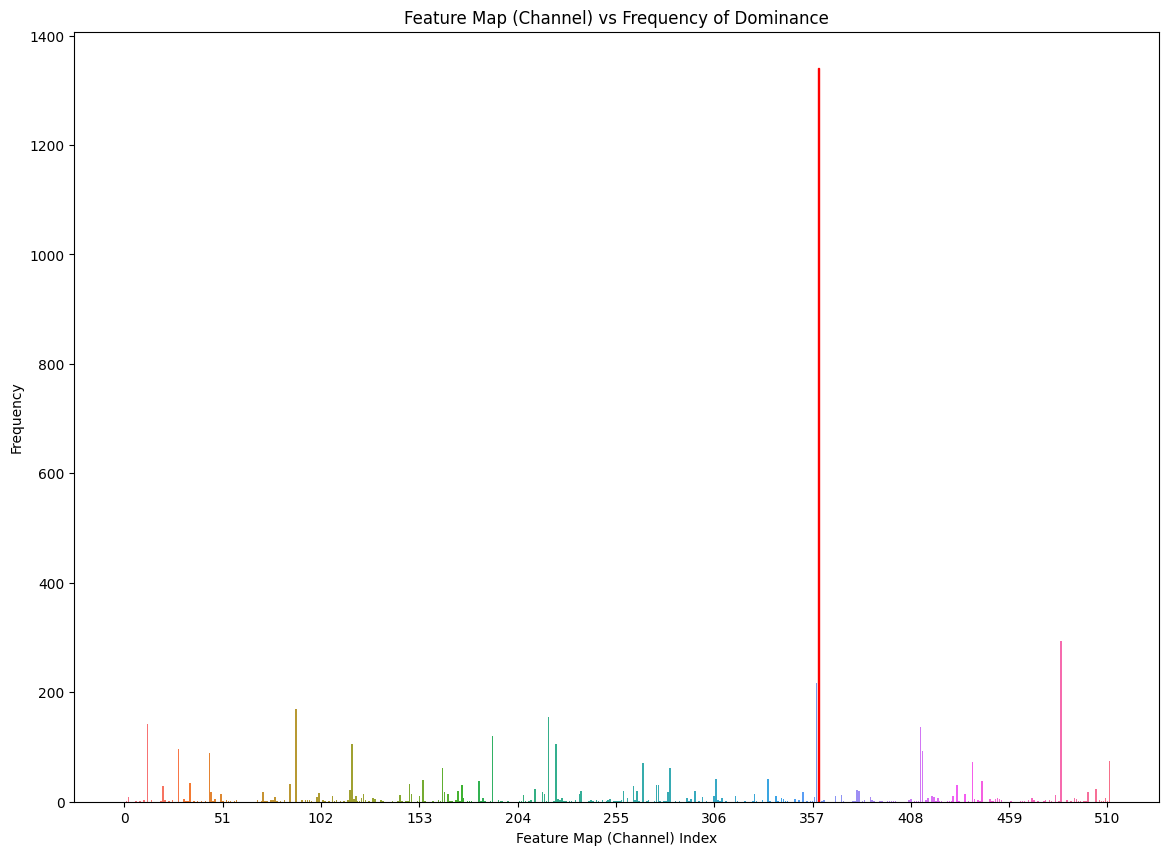

In [ ]:
import seaborn as sb

# num_images, num_channels = pooled_values.shape
channel_indices = list(range(num_channels))

vibrant_colors = sb.color_palette("husl", num_channels)


highlight_color = 'red'

plt.figure(figsize=(14, 10))



bars = plt.bar(channel_indices, frequency_values, color=vibrant_colors,linewidth=1)


bars[max_frequent_channel].set_color(highlight_color)

#
#plt.bar(channel_indices, frequency_values, color='skyblue')
plt.xlabel('Feature Map (Channel) Index')
plt.ylabel('Frequency')
plt.title('Feature Map (Channel) vs Frequency of Dominance')
plt.xticks(np.arange(0, num_channels, step=max(1, num_channels//10)))  # Adjust x-ticks to avoid clutter
#plt.grid(axis='y', linestyle='--', alpha=0.7,linewidth=3)
plt.show()

In [ ]:
def get_feature_map(image_index,channel):
    feature_map = desired_layer_output[image_index, :, :, channel]
    return feature_map

./oxford_001567.jpg
360


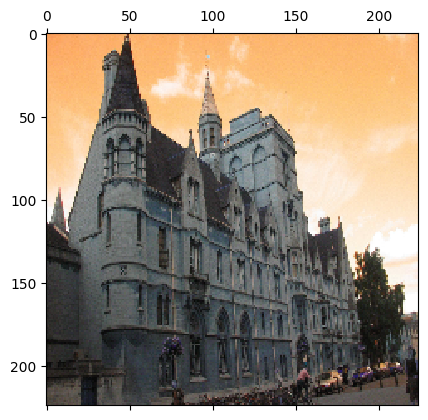

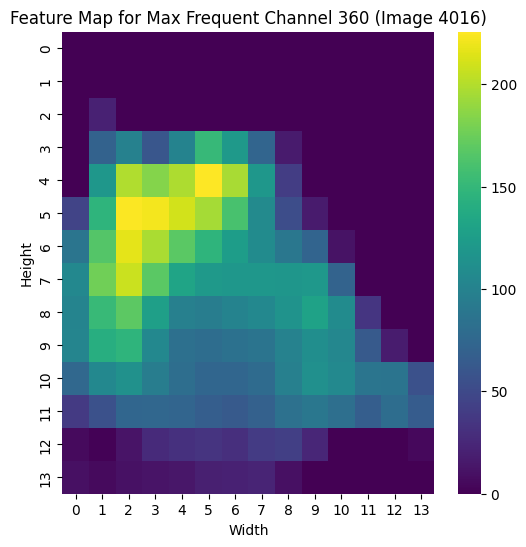

In [ ]:
#random_image = np.random.randint(0,desired_layer_output.shape[0])
random_image = get_index_by_filename("./oxford_001753.jpg", image_filenames)
print(image_filenames[0])
print(dominant_feature_map_indices[random_image])

# 14 / 14
max_frequent_channel_feature_map =  get_feature_map(random_image, max_frequent_channel)

plt.matshow(images[random_image])

plt.figure(figsize=(6, 6))


sb.heatmap(max_frequent_channel_feature_map, cmap='viridis', cbar=True)

plt.title(f'Feature Map for Max Frequent Channel {max_frequent_channel} (Image {random_image})')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [ ]:
def extract_threshold(spatial_matrix):
    flattened = spatial_matrix.flatten()
    sorted_array = np.sort(flattened)
    median = np.median(sorted_array)
    return median


In [ ]:
def extract_mask_(spatial_matrix):
    tm = extract_threshold(spatial_matrix)
    spatial_mask_ = np.where(spatial_matrix < tm, 0, 1)
    return spatial_mask_

In [ ]:
def extract_mask__(spatial_mask_):

    labeled_matrix, num_features = label(spatial_mask_)
    for i in range(1, num_features + 1):

        component_slice = find_objects(labeled_matrix == i)[0]

        component = labeled_matrix[component_slice] == i


        if np.sum(component) < 4:

            labeled_matrix[component_slice][component] = 0

    spatial_mask__ = np.where(labeled_matrix > 0, 1, 0)

    return spatial_mask__

In [ ]:
def extract_mask(spatial_mask__):

    spatial_mask__ = spatial_mask__.astype(np.uint8)

    contours, _ = cv2.findContours(spatial_mask__, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    hull = [cv2.convexHull(c) for c in contours]


    convex_hull_matrix = np.zeros_like(spatial_mask__)


    cv2.drawContours(convex_hull_matrix, hull, -1, 1, thickness=-1)  # -1 to fill the hull with 1's

    return convex_hull_matrix


In [ ]:
tm = extract_threshold(max_frequent_channel_feature_map)
I_ = extract_mask_(max_frequent_channel_feature_map)
I__ = extract_mask__(I_)
I = extract_mask(I__)
tm, max_frequent_channel_feature_map, I_, I__,I

(10.32232,
 array([[  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,  14.089042  ,  45.96

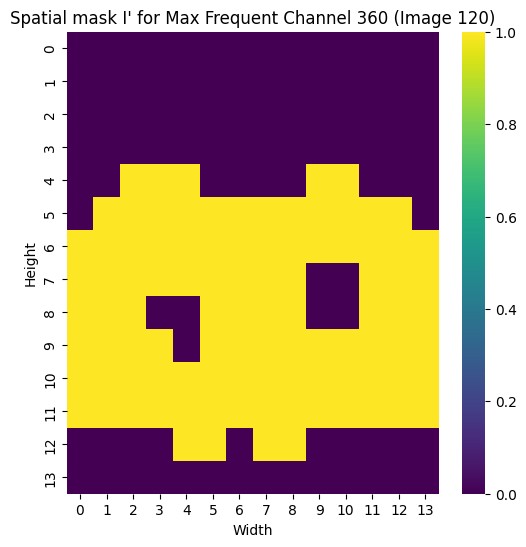

In [ ]:


plt.figure(figsize=(6, 6))


sb.heatmap(I_, cmap='viridis', cbar=True)

plt.title(f'Spatial mask I\' for Max Frequent Channel {max_frequent_channel} (Image {random_image})')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

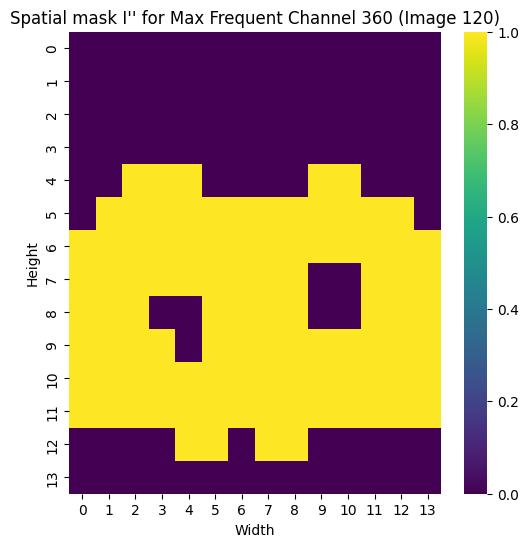

In [ ]:
plt.figure(figsize=(6, 6))


sb.heatmap(I__, cmap='viridis', cbar=True)

plt.title(f'Spatial mask I\'\' for Max Frequent Channel {max_frequent_channel} (Image {random_image})')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

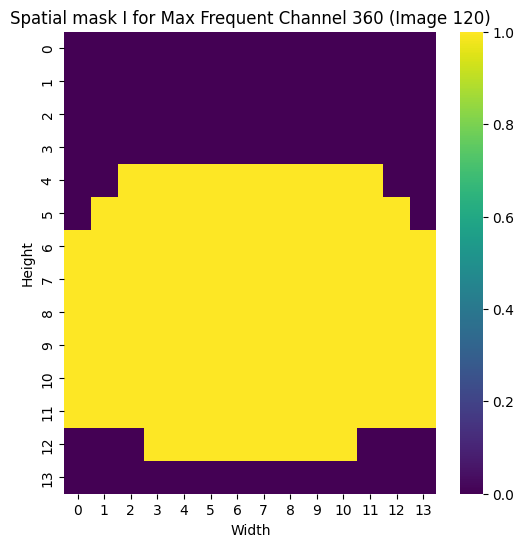

In [ ]:
plt.figure(figsize=(6, 6))


sb.heatmap(I, cmap='viridis', cbar=True)

plt.title(f'Spatial mask I for Max Frequent Channel {max_frequent_channel} (Image {random_image})')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [ ]:
def extract_mask_for_an_image(image_index,channel):

    feature_map = get_feature_map(image_index,channel)
    #tm = extract_threshold(feature_map)
    #max_frequent_channel_feature_map =
    I_ = extract_mask_(feature_map)
    I__ = extract_mask__(I_)
    I = extract_mask(I__)
    return I


In [ ]:
def extract_mask_for_batch_images(num_channels,channel):
    IB = []

    for image_index in range( 0, num_images ):

        feature_map = get_feature_map(image_index,channel)
        #tm = extract_threshold(feature_map)
        #max_frequent_channel_feature_map =
        I_ = extract_mask_(feature_map)
        I__ = extract_mask__(I_)
        I = extract_mask(I__)
        IB.append(I)

    return IB



In [ ]:
# num_images, num_channels = pooled_values.shape
# I = extract_mask_for_an_image(random_image,max_frequent_channel)
# S_i = np.empty_like[I]
#     for channel_index in range( 0, num_channels ):
#         X = get_feature_map(random_image,channel_index)
#         X = np.dot(X,I)
#         S_i = S_i + X

In [ ]:
# num_images, num_channels = pooled_values.shape

# S_ = []
# for image_index in range( 0, num_images ):
#     I = extract_mask_for_an_image(image,max_frequent_channel)
#     S_i = np.zeros_like(I)
#     for channel_index in range( 0, num_channels ):
#         X = get_feature_map(image_index,channel_index)
#         X = np.dot(X,I)
#         S_i = S_i + X
#     S_.append(S_i)

In [ ]:
def get_Spatial_Weight_for_an_image(num_channels, image_index,max_frequent_channel):


    I = extract_mask_for_an_image(image_index,max_frequent_channel)

    S_i = np.zeros_like(I)

    for channel_index in range( 0, num_channels ):

        X = get_feature_map(image_index,channel_index)
        #X = np.dot(X,I)
        X = X * I
        S_i = S_i + X

    return S_i

In [ ]:
def get_Spatial_Weight_for_batch_images(pooled_values,max_frequent_channel):

    num_images, num_channels = pooled_values.shape

    S_ = []
    for image_index in range( 0, num_images ):
        I = extract_mask_for_an_image(image_index,max_frequent_channel)
        S_i = np.zeros_like(I)
        for channel_index in range( 0, num_channels ):
            X = get_feature_map(image_index,channel_index)
            #X = np.dot(X,I)
            X = X* I
            S_i = S_i + X
        S_.append(S_i)

    return S_

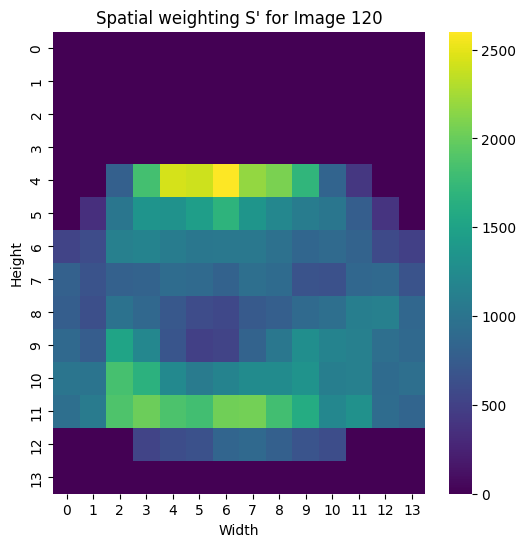

In [ ]:
plt.figure(figsize=(6, 6))


sb.heatmap(get_Spatial_Weight_for_an_image(num_channels,random_image,max_frequent_channel), cmap='viridis', cbar=True)

plt.title(f'Spatial weighting S\' for Image {random_image}')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [ ]:
# S_ = get_Spatial_Weight_for_batch_images(pooled_values,max_frequent_channel)
# alpha = int(0.1 * S_[random_image].size)  # The number of top responses you want to consider
# flat_indices = np.argsort(S_[random_image].ravel())[::-1]  # Sort values in descending order
# top_alpha_indices = flat_indices[:alpha]  # Get indices of top alpha values

# # Convert flat indices back to 2D indices (coordinates)
# top_alpha_coords = np.array(np.unravel_index(top_alpha_indices, S_[random_image].shape)).T

# # Step 3: Compute the geometric center (centroid)
# centroid = np.mean(top_alpha_coords, axis=0)  # Average of the top alpha coordinates

# # Step 4: Create a Gaussian distribution centered at the centroid
# x, y = np.meshgrid(np.linspace(0, S_[random_image].shape[1]-1, S_[random_image].shape[1]),
#                    np.linspace(0, S_[random_image].shape[0]-1, S_[random_image].shape[0]))

# # Standard deviation for the Gaussian

# top_boundary_distance = centroid[0]  # Distance to the top boundary
# bottom_boundary_distance = S_[random_image].shape[0] - centroid[0]  # Distance to the bottom boundary
# left_boundary_distance = centroid[1]  # Distance to the left boundary
# right_boundary_distance = S_[random_image].shape[1] - centroid[1]  # Distance to the right boundary


# max_distance = max(top_boundary_distance, bottom_boundary_distance,
#                     left_boundary_distance, right_boundary_distance)

# sigma = max_distance/2

# # Gaussian distribution centered at the centroid
# gaussian = (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - centroid[1])**2 + (y - centroid[0])**2) / (2 * sigma**2))

# # Apply the Gaussian to smooth the original 2D array (optional)
# # smoothed_array_2d = gaussian_filter(array_2d, sigma=sigma)

# # Visualize the original array and Gaussian overlay
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title("Original spatial weight")
# plt.imshow(S_[random_image], cmap='viridis')

# plt.subplot(1, 2, 2)
# plt.title(f"Gaussian Centered at Centroid ({centroid[0]:.2f}, {centroid[1]:.2f})")
# plt.imshow(gaussian, cmap='viridis')

# plt.show()

In [ ]:
def get_Alpha(fraction,size):

    return int(fraction*size)

In [ ]:
def get_Cetroid(alpha,s_):

    flat_indices = np.argsort(s_.ravel())[::-1]  # Sort values in descending order
    top_alpha_indices = flat_indices[:alpha]  # Get indices of top alpha values
    top_alpha_coords = np.array(np.unravel_index(top_alpha_indices, s_.shape)).T
    centroid = np.mean(top_alpha_coords, axis=0)  # Average of the top alpha coordinates
    return centroid

In [ ]:
def get_Sigma(rightY,bottomX,centroid):
#     x, y = np.meshgrid(np.linspace(0, rightY-1, rightY),
#                    np.linspace(0, bottomX-1, bottomX))

    # Standard deviation for the Gaussian

    top_boundary_distance = centroid[0]  # Distance to the top boundary
    bottom_boundary_distance = bottomX - centroid[0]  # Distance to the bottom boundary
    left_boundary_distance = centroid[1]  # Distance to the left boundary
    right_boundary_distance = rightY - centroid[1]
    max_distance = max(top_boundary_distance, bottom_boundary_distance, left_boundary_distance, right_boundary_distance)

    sigma = max_distance/2
    return sigma

In [ ]:
def get_Weight_Function_for_an_image(num_channels, image_index, max_frequent_channel, alpha_fraction = 0.1 ):

    #S = []


    #S_ = get_Spacial_Weight(pooled_values,max_frequent_channel)




    S_ = get_Spatial_Weight_for_an_image(num_channels, image_index, max_frequent_channel)
    alpha = get_Alpha(alpha_fraction, S_.size)
    rightY = S_.shape[1]
    bottomX = S_.shape[0]
    centroid = get_Cetroid(alpha,S_)
    sigma = get_Sigma(rightY,bottomX,centroid)
    x, y = np.meshgrid(np.linspace(0, rightY-1, rightY),
                   np.linspace(0, bottomX-1, bottomX))
    gaussian = (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - centroid[1])**2 + (y - centroid[0])**2) / (2 * sigma**2))


    return gaussian

In [ ]:
def get_Weight_Function_for_batch_images(pooled_values,max_frequent_channel, alpha_fraction = 0.1):

    S = []
    fraction = 0.1

    #S_ = get_Spatial_Weight(pooled_values,max_frequent_channel)
    num_images, num_channels = pooled_values.shape

    for image_index in range( 0, num_images ):

        S_ = get_Spatial_Weight_for_an_image(pooled_values, image_index, max_frequent_channel)
        alpha = get_Alpha(alpha_fraction, S_.size)
        rightY = S_.shape[1]
        bottomX = S_.shape[0]
        centroid = get_Cetroid(alpha,S_)
        sigma = get_Sigma(rightY,bottomX,centroid)
        gaussian = (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - centroid[1])**2 + (y - centroid[0])**2) / (2 * sigma**2))
        S.append(gaussian)

    return S


In [ ]:
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title("Original spatial weight")
# plt.scatter(centroid[1], centroid[0], color='black', marker='x', s=100, label='Centroid')
# plt.imshow(get_Spatial_Weight_for_an_image(num_channels, random_image, max_frequent_channel), cmap='viridis')

# plt.subplot(1, 2, 2)
# plt.title(f"Gaussian Centered at Centroid ({centroid[0]:.2f}, {centroid[1]:.2f})")
# plt.scatter(centroid[1], centroid[0], color='black', marker='x', s=100, label='Centroid')
# plt.imshow(get_Weight_Function_for_an_image(num_channels, random_image, max_frequent_channel, alpha_fraction = 0.1), cmap='viridis')

# plt.show()

In [ ]:
def get_Omega_for_batch_images(pooled_values,max_frequent_channel, alpha_fraction = 0.1):

    num_images, num_channels = pooled_values.shape
    image_array = []
    omega = []

    for image_index in range( 0, num_images ):
        I = extract_mask_for_an_image(image_index,max_frequent_channel)
        S = get_Weight_Function_for_an_image(pooled_values, image_index, max_frequent_channel, alpha_fraction = 0.1)

        for channel_index in range( 0, num_channels ):

            X = get_feature_map(image_index,channel_index)
            X = I * S * X
            omega.append( np.sum(X) )

        image_array.append( omega )

    return image_array


In [ ]:
def get_Omega_for_an_image(num_channels, image_index, max_frequent_channel, alpha_fraction = 0.1):

#     num_images, num_channels = pooled_values.shape
    omega = []


    I = extract_mask_for_an_image(image_index,max_frequent_channel)
    S = get_Weight_Function_for_an_image(num_channels, image_index, max_frequent_channel, alpha_fraction = 0.1)

    for channel_index in range( 0, num_channels ):

        X = get_feature_map(image_index,channel_index)
        X = I * S * X
        omega.append( np.sum(X) )



    return omega

In [ ]:
alpha_fraction = 0.1
Omega=get_Omega_for_an_image(num_channels, random_image, max_frequent_channel, alpha_fraction)
Omega

[2.2075115753015195,
 3.007092648706081,
 1.086768193701153,
 2.7767280842159026,
 0.018439037947638712,
 0.024005564108056644,
 0.4480286582335069,
 0.0,
 0.0,
 0.0,
 0.004356448918384578,
 0.0,
 5.938946768068144,
 0.0,
 0.0,
 0.04929098900513801,
 0.18064613477620176,
 0.14130689416652384,
 0.034462279076149155,
 0.5289152384138424,
 1.6303230637402042,
 0.0,
 0.10180287297319611,
 3.08041981921414,
 0.0,
 0.05676024574649487,
 0.16743738050303797,
 0.03630071660246177,
 0.0,
 0.2715583315306094,
 0.09019850057294274,
 0.0,
 6.128531932204005,
 0.0,
 0.3451250611318951,
 0.01110523988392678,
 0.0,
 0.0,
 0.0,
 0.21624650377999102,
 0.0,
 0.0,
 0.003926598299557461,
 0.02173388328401881,
 0.30089744833174287,
 0.0023916795081500987,
 0.0,
 0.0,
 0.014942623537735431,
 0.38893573101729495,
 0.3957910551455952,
 0.0,
 0.0,
 3.018107899674882,
 1.9112391440877223,
 0.14561288357513216,
 0.0,
 11.024541862542137,
 13.653781483072281,
 0.08793999932395341,
 0.0,
 0.16575849780169058,
 0.1

In [ ]:
def get_b_for_an_image(Omega,num_channels,p):
#     num_images, num_channels = pooled_values.shape

#     b=np.zeros((num_images,num_channels))

    b=np.zeros(num_channels)

    for k in range( 0, num_channels ):
        b[k]=(Omega[k]/(Height*Width))**p

    return b




In [ ]:
p= 2
b_values=get_b_for_an_image(Omega,num_channels,2)
print(b_values)

[1.26850983e-04 2.35386459e-04 3.07440938e-05 2.00703323e-04
 8.85043004e-09 1.50007056e-08 5.22515823e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.94029758e-10 0.00000000e+00
 9.18135379e-04 0.00000000e+00 0.00000000e+00 6.32445230e-08
 8.49464442e-07 5.19774009e-07 3.09154696e-08 7.28215664e-06
 6.91887050e-05 0.00000000e+00 2.69778867e-07 2.47006098e-04
 0.00000000e+00 8.38641581e-08 7.29781247e-07 3.43019061e-08
 0.00000000e+00 1.91961494e-06 2.11780756e-07 0.00000000e+00
 9.77689079e-04 0.00000000e+00 3.10056507e-06 3.21028615e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.21726756e-06
 0.00000000e+00 0.00000000e+00 4.01347725e-10 1.22959622e-08
 2.35681160e-06 1.48899700e-10 0.00000000e+00 0.00000000e+00
 5.81221361e-09 3.93770832e-06 4.07774259e-06 0.00000000e+00
 0.00000000e+00 2.37114101e-04 9.50862939e-05 5.51934399e-07
 0.00000000e+00 3.16379954e-03 4.85281520e-03 2.01307879e-07
 0.00000000e+00 7.15219690e-07 8.07997602e-07 2.17653631e-08
 1.09603945e-05 0.000000

In [ ]:
def calculate_channel_weighting_vector(b_values, epsilon=1e-6):
    num_channels = len(b_values)

    B = np.log(((num_channels*epsilon) + np.sum(b_values, axis=0)) / (b_values + epsilon))

    return B

# Calculate the channel weighting vector B
epsilon = 1e-6
channel_weighting_vector = calculate_channel_weighting_vector(b_values, epsilon)
channel_weighting_vector


array([ 7.27736956,  6.66276695,  8.67052827,  6.82143703, 12.11942346,
       12.11334564, 10.29963609, 12.12823495, 12.12823495, 12.12823495,
       12.12774104, 12.12823495,  5.30480153, 12.12823495, 12.12823495,
       12.06690985, 11.51333885, 11.70967331, 12.09778774, 10.01413155,
        7.87704755, 12.12823495, 11.88939219,  6.61478162, 12.12823495,
       12.04770237, 11.58024   , 12.09450824, 12.12823495, 11.05678322,
       11.93614398, 12.12823495,  5.24202095, 12.12823495, 10.71711017,
       12.12502981, 12.12823495, 12.12823495, 12.12823495, 11.33195935,
       12.12823495, 12.12823495, 12.12783369, 12.11601397, 10.91724336,
       12.12808606, 12.12823495, 12.12823495, 12.12243956, 10.53133363,
       10.50336816, 12.12823495, 12.12823495,  6.65548498,  7.56298827,
       11.6887328 , 12.12823495,  4.06838996,  3.64071464, 11.94482409,
       12.12823495, 11.58869378, 11.53601502, 12.10670307,  9.64663422,
       12.12823495, 12.12823495, 12.12165841,  6.04800433, 12.08

In [ ]:
#step 6 channel weighting
def get_beta_for_an_image(channel_weighting_vector,Omega):
    Omega=np.array(Omega,dtype='float32')
    return channel_weighting_vector*Omega

beta_values=get_beta_for_an_image(channel_weighting_vector,Omega)
# print(type(beta_values))
print(beta_values)


[1.60648782e+01 2.00355580e+01 9.42285397e+00 1.89412763e+01
 2.23470506e-01 2.90787693e-01 4.61453209e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.28338854e-02 0.00000000e+00
 3.15049337e+01 0.00000000e+00 0.00000000e+00 5.94789916e-01
 2.07984018e+00 1.65465754e+00 4.16917355e-01 5.29662666e+00
 1.28421322e+01 0.00000000e+00 1.21037425e+00 2.03763041e+01
 0.00000000e+00 6.83830527e-01 1.93896498e+00 4.39039297e-01
 0.00000000e+00 3.00256174e+00 1.07662231e+00 0.00000000e+00
 3.21258928e+01 0.00000000e+00 3.69874317e+00 1.34651370e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.45049655e+00
 0.00000000e+00 0.00000000e+00 4.76211332e-02 2.63328039e-01
 3.28497068e+00 2.90064941e-02 0.00000000e+00 0.00000000e+00
 1.81141052e-01 4.09601209e+00 4.15713915e+00 0.00000000e+00
 0.00000000e+00 2.00869717e+01 1.44546793e+01 1.70203005e+00
 0.00000000e+00 4.48521353e+01 4.97095236e+01 1.05042783e+00
 0.00000000e+00 1.92092439e+00 2.03243616e+00 3.50078073e-01
 6.25957706e+00 0.000000

In [ ]:
# Step 7: Normalize the feature vector (L1 normalization)
def normalize_vector(vector):
    norm = np.sum(np.abs(vector))  # L1 norm (sum of absolute values)
    if norm == 0:
        return vector
    return vector / norm

# Normalize the aggregated features
def normalize_features(features):
    return np.array([normalize_vector(feature) for feature in features])

normalized_beta = normalize_vector(beta_values)
normalized_beta


array([4.87078474e-03, 6.07467350e-03, 2.85695868e-03, 5.74289317e-03,
       6.77550566e-05, 8.81652659e-05, 1.39910133e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.60189501e-05, 0.00000000e+00,
       9.55212658e-03, 0.00000000e+00, 0.00000000e+00, 1.80337106e-04,
       6.30596366e-04, 5.01683275e-04, 1.26407102e-04, 1.60590874e-03,
       3.89366547e-03, 0.00000000e+00, 3.66978970e-04, 6.17798591e-03,
       0.00000000e+00, 2.07333741e-04, 5.87883763e-04, 1.33114356e-04,
       0.00000000e+00, 9.10360585e-04, 3.26426097e-04, 0.00000000e+00,
       9.74039805e-03, 0.00000000e+00, 1.12143905e-03, 4.08255718e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.42977386e-04,
       0.00000000e+00, 0.00000000e+00, 1.44384717e-05, 7.98396464e-05,
       9.95985457e-04, 8.79461315e-06, 0.00000000e+00, 0.00000000e+00,
       5.49209937e-05, 1.24188885e-03, 1.26042225e-03, 0.00000000e+00,
       0.00000000e+00, 6.09026188e-03, 4.38258107e-03, 5.16046366e-04,
      

In [ ]:
def get_beta_prime_for_batch(num_images,num_channels, max_frequent_channel):

    batch_beta = []

#     Omega=get_Omega_for_an_image(num_channels, random_image, max_frequent_channel)
#     b_values=get_b_for_an_image(Omega,num_channels,2)
#     channel_weighting_vector = calculate_channel_weighting_vector(b_values)
#     beta_values=get_beta_for_an_image(channel_weighting_vector,Omega)
#     normalized_beta = normalize_vector(beta_values)
#     print(normalized_beta)


    for image_index in range( 0, num_images ):
        Omega=get_Omega_for_an_image(num_channels, image_index, max_frequent_channel)
        b_values=get_b_for_an_image(Omega,num_channels,2)
        channel_weighting_vector = calculate_channel_weighting_vector(b_values)
        beta_values=get_beta_for_an_image(channel_weighting_vector,Omega)
        normalized_beta = normalize_vector(beta_values)

        batch_beta.append(normalized_beta)

    return batch_beta


normalized_beta_for_batch = get_beta_prime_for_batch(num_images,num_channels, max_frequent_channel)
# get_beta_prime_for_batch(num_images,num_channels)
print(normalized_beta_for_batch[random_image])

[4.87078474e-03 6.07467350e-03 2.85695868e-03 5.74289317e-03
 6.77550566e-05 8.81652659e-05 1.39910133e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.60189501e-05 0.00000000e+00
 9.55212658e-03 0.00000000e+00 0.00000000e+00 1.80337106e-04
 6.30596366e-04 5.01683275e-04 1.26407102e-04 1.60590874e-03
 3.89366547e-03 0.00000000e+00 3.66978970e-04 6.17798591e-03
 0.00000000e+00 2.07333741e-04 5.87883763e-04 1.33114356e-04
 0.00000000e+00 9.10360585e-04 3.26426097e-04 0.00000000e+00
 9.74039805e-03 0.00000000e+00 1.12143905e-03 4.08255718e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.42977386e-04
 0.00000000e+00 0.00000000e+00 1.44384717e-05 7.98396464e-05
 9.95985457e-04 8.79461315e-06 0.00000000e+00 0.00000000e+00
 5.49209937e-05 1.24188885e-03 1.26042225e-03 0.00000000e+00
 0.00000000e+00 6.09026188e-03 4.38258107e-03 5.16046366e-04
 0.00000000e+00 1.35989264e-02 1.50716604e-02 3.18484073e-04
 0.00000000e+00 5.82413952e-04 6.16223720e-04 1.06141791e-04
 1.89787013e-03 0.000000

In [ ]:
print(len(normalized_beta_for_batch)) #5063 arrays
normalized_beta_for_batch = np.array(normalized_beta_for_batch)
print(normalized_beta_for_batch.shape)
print(normalized_beta_for_batch[random_image])

5063
(5063, 512)
[4.87078474e-03 6.07467350e-03 2.85695868e-03 5.74289317e-03
 6.77550566e-05 8.81652659e-05 1.39910133e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.60189501e-05 0.00000000e+00
 9.55212658e-03 0.00000000e+00 0.00000000e+00 1.80337106e-04
 6.30596366e-04 5.01683275e-04 1.26407102e-04 1.60590874e-03
 3.89366547e-03 0.00000000e+00 3.66978970e-04 6.17798591e-03
 0.00000000e+00 2.07333741e-04 5.87883763e-04 1.33114356e-04
 0.00000000e+00 9.10360585e-04 3.26426097e-04 0.00000000e+00
 9.74039805e-03 0.00000000e+00 1.12143905e-03 4.08255718e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.42977386e-04
 0.00000000e+00 0.00000000e+00 1.44384717e-05 7.98396464e-05
 9.95985457e-04 8.79461315e-06 0.00000000e+00 0.00000000e+00
 5.49209937e-05 1.24188885e-03 1.26042225e-03 0.00000000e+00
 0.00000000e+00 6.09026188e-03 4.38258107e-03 5.16046366e-04
 0.00000000e+00 1.35989264e-02 1.50716604e-02 3.18484073e-04
 0.00000000e+00 5.82413952e-04 6.16223720e-04 1.06141791e-04
 1.8978

In [ ]:
# # Step 8: PCA Whitening
# # it is done for more than one images
# from sklearn.decomposition import PCA

# def apply_pca_whitening(aggregated_features, num_components=100): # num_components(k_) = 0 - min(num_images,num_chnnels)

#     pca = PCA(n_components=num_components, whiten=True)

#     whitened_features = pca.fit_transform(aggregated_features)
#     pca_transformation_matrix = pca.components_
#     pca_explained_variance = pca.explained_variance_
#     return whitened_features,pca_transformation_matrix,pca_explained_variance

# # print(apply_pca_whitening())

# reduced_features = 100
# beta_, pca_transformation_matrix, pca_explained_variance = apply_pca_whitening(normalized_beta_for_batch, reduced_features)
# normalized_beta_=normalize_features(beta_)


In [ ]:
# normalized_beta_.shape

In [ ]:
# print(normalized_beta_for_batch[random_image])
# print(beta_[random_image])
# print(normalized_beta_[random_image])

# pca_transformation_matrix.shape, pca_explained_variance.shape

In [ ]:

mean_X = np.mean(normalized_beta_for_batch, axis=0)

s = normalized_beta_for_batch[random_image] - mean_X
# x = np.dot( pca_transformation_matrix,s )
# d = np.diag(1.0 / np.sqrt(pca_explained_variance))  # Inverse sqrt of eigenvalues
# X_whitened = np.dot(x, d)

# s,ms = standardize(normalized_beta_for_batch[random_image])
# X = np.dot( s,V_k )

# x,X,x.shape, np.sqrt(pca_explained_variance).shape,pca_explained_variance, x/np.sqrt(pca_explained_variance), X/np.sqrt(eigenvalues_sorted[:k])
# print(normalized_beta_for_batch[random_image])
# print(beta_[random_image])
# print(x/np.sqrt(pca_explained_variance))
# # print(normalized_beta_[random_image])

In [ ]:
# # normalized_beta[4225]

def standardize(X):
    mean_X = np.mean(X, axis=0)
    X_centered = X - mean_X
    return X_centered, mean_X

# Step 2: Compute the covariance matrix of the centered data
def compute_covariance(X_centered):
    covariance_matrix = np.cov(X_centered, rowvar=False)
    return covariance_matrix

# Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
def compute_eigen_decomposition(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)  # For symmetric matrices
    return eigenvalues, eigenvectors

# Step 4: Sort eigenvalues and eigenvectors in descending order
def sort_eigen(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    return eigenvalues_sorted, eigenvectors_sorted

# Step 5: Select top k eigenvectors (based on desired number of components)
def select_top_k(eigenvectors_sorted, k):
    V_k = eigenvectors_sorted[:, :k]
    return V_k

# Step 6: Transform the data to the new space (PCA transformation)
def transform_data(X_centered, V_k):
    X_pca = np.dot(X_centered, V_k)
    return X_pca

# Step 7: Whiten the data by scaling by the inverse of the square root of the eigenvalues
def whiten_data(X_pca, eigenvalues_sorted, k):
    D_inv_sqrt = np.diag(1.0 / np.sqrt(eigenvalues_sorted[:k]))  # Inverse sqrt of eigenvalues
    X_whitened = np.dot(X_pca, D_inv_sqrt)
    return X_whitened


# Number of components to keep
k = 100

# Step 1: Standardize the data
X_centered, mean_X = standardize(normalized_beta_for_batch)

# Step 2: Compute the covariance matrix
cov_matrix = compute_covariance(X_centered)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = compute_eigen_decomposition(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
eigenvalues_sorted, eigenvectors_sorted = sort_eigen(eigenvalues, eigenvectors)

# Step 5: Select top k eigenvectors
V_k = select_top_k(eigenvectors_sorted, k)

# Step 6: Transform the data using the top k eigenvectors (PCA transformation)
X_pca = transform_data(X_centered, V_k)

# Step 7: Whiten the data
X_whitened = whiten_data(X_pca, eigenvalues_sorted, k)
# X_whitened[random_image],V_k[0],eigenvalues_sorted[:k]

pca_transformation_matrix = V_k.T
pca_explained_variance = eigenvalues_sorted[:k]
beta_ = X_whitened
normalized_beta_=normalize_features(beta_)
reduced_features = k




In [ ]:
# data = []

# for i in range(0,num_query_images):
#     row = [image_filenames[i]]  # Start with the filename
#     row.extend(normalized_beta_[i])  # Add beta values (100 values)

#     data.append(row)

# # Create column names
# normalized_beta_columns = [f'beta_{i+1}' for i in range(reduced_features)]  # Beta value columns

# columns = ['filename'] + normalized_beta_columns   # Final column names

# # Create a DataFrame
# df = pd.DataFrame(data, columns=columns)

# # Save the DataFrame to a CSV file
# output_csv_path = 'image_features_with_pca.csv'
# df.to_csv(output_csv_path, index=False)


In [ ]:
# data = []

# for i in range(0,num_query_images):
#     row = [image_filenames[i]]  # Start with the filename
#     row.extend(normalized_beta_for_batch[i])  # Add beta values (512 values)

#     data.append(row)

# # Create column names
# normalized_beta_columns = [f'beta_{i+1}' for i in range(desired_layer_output.shape[3])]  # Beta value columns

# columns = ['filename'] + normalized_beta_columns   # Final column names

# # Create a DataFrame
# df = pd.DataFrame(data, columns=columns)

# # Save the DataFrame to a CSV file
# output_csv_path = 'image_features.csv'
# df.to_csv(output_csv_path, index=False)

In [ ]:
pca_matrix_df = pd.DataFrame(pca_transformation_matrix)

# Save the PCA transformation matrix to a CSV file
pca_matrix_csv_path = 'pca_transformation_matrix.csv'
pca_matrix_df.to_csv(pca_matrix_csv_path, index=False)

pca_explained_variance_df = pd.DataFrame(pca_explained_variance)

pca_explained_variance_csv_path = 'pca_explained_variance.csv'
pca_explained_variance_df.to_csv(pca_explained_variance_csv_path, index=False)

feature_mean_df = pd.DataFrame(np.mean(normalized_beta_for_batch,axis = 0))

feature_mean_csv_path = 'feature_mean.csv'
feature_mean_df.to_csv(feature_mean_csv_path, index=False)

In [ ]:
data = {
    'Parameters': [
        'Layer',
        'Number of Images',
        'Width',
        'Height',
        'Channel',
        'Max Frequent Channel',
        'Alpha Fraction',
        'p',
        'epsilon',
        'Number of reduced features'
    ],
    'Value': [
        layer,
        desired_layer_output.shape[0],
        desired_layer_output.shape[1],
        desired_layer_output.shape[2],
        desired_layer_output.shape[3],
        max_frequent_channel,
        alpha_fraction,
        p,
        epsilon,
        reduced_features
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Write the DataFrame to an Excel file
output_excel_path = 'parameters.xlsx'
df.to_excel(output_excel_path, index=False)